# Entegable 1- Métricas, Árboles de decisión y Random Forest

Francisco Javier Mercader Martínez

## Machine Learning. Grado en Ciencia de datos

Los siguientes ejercicios tienen que ser entregados dentro de las dos horas de prácticas. Como realizar el entregable:


-   La realización se debe de hacer de forma  **INDIVIDUAL**
-   Se debe de enviar un notebook con el código y las explicaciones, comentarios, análisis y justificaciones en Markdown.
-   Reproducibilidad:
    -   Se debe de establecer una variable semilla con un número al inicio, esta variables será la que se utilice para el np.random_seed y para el random_state.
    -   Las bases de datos se cargan con rutas relativas.
-   El notebook se debe de subir a la tarea del aula virtual creada antes de la finalización de la hora de clase. (Ver tarea y fecha de cierre)

### DATASET

El dataset obesidad.csv describe los siguientes atributos:
- GENERO: Género de la persona. 0: Hombre, 1:Mujer
- EDAD: Edad en años
- ALTURA: ALtura de la persona en metros
- PESO: Peso de la persona en kg
- HISTORIAL: Si hay antecedentes de obesidad en la familia. 0:no, 1:si
- CBASURA: Si come comida basura. 0:no, 1:si
- NVEGETALES: Media de veces que come verdura durante la semana
- NCOMIDAS: Media de comidas que hace al día
- FUMAS: Si el paciente fuma. 0:no, 1:si
- LAGUA: Media de Litros de agua que bebe al día
- CCALORIAS: Control de las calorias en las comidas. 0:no, 1:si
- EJERCICIO: Media de veces que hace ejercicio a la semana
- TECNOLOGIA: Media de días que usa tecnología a la semana
- ALCOHOL: Frecuencia con la que toma alcohol no, frecuently, sometimes
- OBESIDAD: Si el paciente tiene obesidad. 0:no, 1:si



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

semilla = 123
np.random.seed(semilla)

### Ejercicio 1

Utilizando el dataset 'OBESIDAD.csv', crea el árbol de decisión que consideres para realizar la regresión de la columna PESO. Para ello, sigue los siguientes pasos:
   1. Carga el dataset (conjunto de datos) y revisa los tipos de datos de los atributos del dataset, analiza si es necesario transformar alguno. En caso de ser necesario realiza la transformación
   2. Crea un hold-out (train-test) 85-15
   3. Crea un árbol de decisión y establece si es necesario realizar poda o no.
   4. Para el árbol sin podar calcula las métricas conocidas para analizar si la estimación de la columna es buena o mala en el conjunto de test. Mínimo calcular 2 métricas. Tras el cálculo de las métricas analiza los resultados. 
   5. Para el árbol con poda, si fuera necesario podar, calcula las métricas conocidas para analizar si la predicción es buena o mala en el conjunto de test. Mínimo calcular 2 métricas. Tras el cálculo de las métricas analiza los resultados. 
   6. Compara los resultados del árbol podado y del árbol sin podar.
   7. El árbol de decisión, ¿es un buen modelo para predecir el peso de un paciente? Razona la respuesta. Dibuja el árbol que mejor resultado haya dado.



In [2]:
# Apartado 1
df = pd.read_csv('OBESIDAD.csv', sep=';')

print("Datos originales")
print(df.info())

# Transformar variables categóricas
ohe = OneHotEncoder(sparse_output=False, drop='first')
alcohol_encoded = ohe.fit_transform(df[['ALCOHOL']])
alcohol_cols = ohe.get_feature_names_out(['ALCOHOL'])
df_alcohol = pd.DataFrame(alcohol_encoded, columns=alcohol_cols, index=df.index)

# Concatenar y eliminar la columna original
df = pd.concat([df.drop('ALCOHOL', axis=1), df_alcohol], axis=1)

# Comprobamos la transformación
print("\nDatos transformados")
print(df.dtypes)

Datos originales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GENERO      1146 non-null   int64  
 1   EDAD        1146 non-null   int64  
 2   ALTURA      1146 non-null   float64
 3   PESO        1146 non-null   float64
 4   HISTORIAL   1146 non-null   int64  
 5   CBASURA     1146 non-null   int64  
 6   NVEGETALES  1146 non-null   float64
 7   NCOMIDAS    1146 non-null   float64
 8   FUMAS       1146 non-null   int64  
 9   LAGUA       1146 non-null   float64
 10  CCALORIAS   1146 non-null   float64
 11  EJERCICIO   1146 non-null   float64
 12  TECNOLOGIA  1146 non-null   float64
 13  ALCOHOL     1146 non-null   object 
 14  OBESIDAD    1146 non-null   int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 134.4+ KB
None

Datos transformados
GENERO                  int64
EDAD                    int64
ALTURA                float64

In [3]:
# Apartado 2
X = df.drop('PESO', axis=1)
y = df['PESO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=semilla)

In [4]:
# Apartado 3
arbol = DecisionTreeRegressor(random_state=semilla)
arbol.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [5]:
# Apartado 4
y_pred = arbol.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Árbol sin podar - MAE: {mae}")
print(f"Árbol sin podar - R2: {r2}")

Árbol sin podar - MAE: 3.0780043139534876
Árbol sin podar - R2: 0.9479555179520702


In [6]:
# Apartado 5
arbol_podado = DecisionTreeRegressor(max_depth=4, random_state=semilla)
arbol_podado.fit(X_train, y_train)
y_pred_podado = arbol_podado.predict(X_test)
mae_podado = mean_absolute_error(y_test, y_pred_podado)
r2_podado = r2_score(y_test, y_pred_podado)

print(f"Árbol podado - MAE: {mae_podado:.4f}")
print(f"Árbol podado - R2: {r2_podado:.4f}")

Árbol podado - MAE: 5.3514
Árbol podado - R2: 0.9070


In [7]:
# Apartado 6
print("Comparación de resultados:")
print(f"Árbol sin podar - MAE: {mae:.4f}, R2: {r2:.4f}")
print(f"Árbol podado - MAE: {mae_podado:.4f}, R2: {r2_podado:.4f}")

Comparación de resultados:
Árbol sin podar - MAE: 3.0780, R2: 0.9480
Árbol podado - MAE: 5.3514, R2: 0.9070


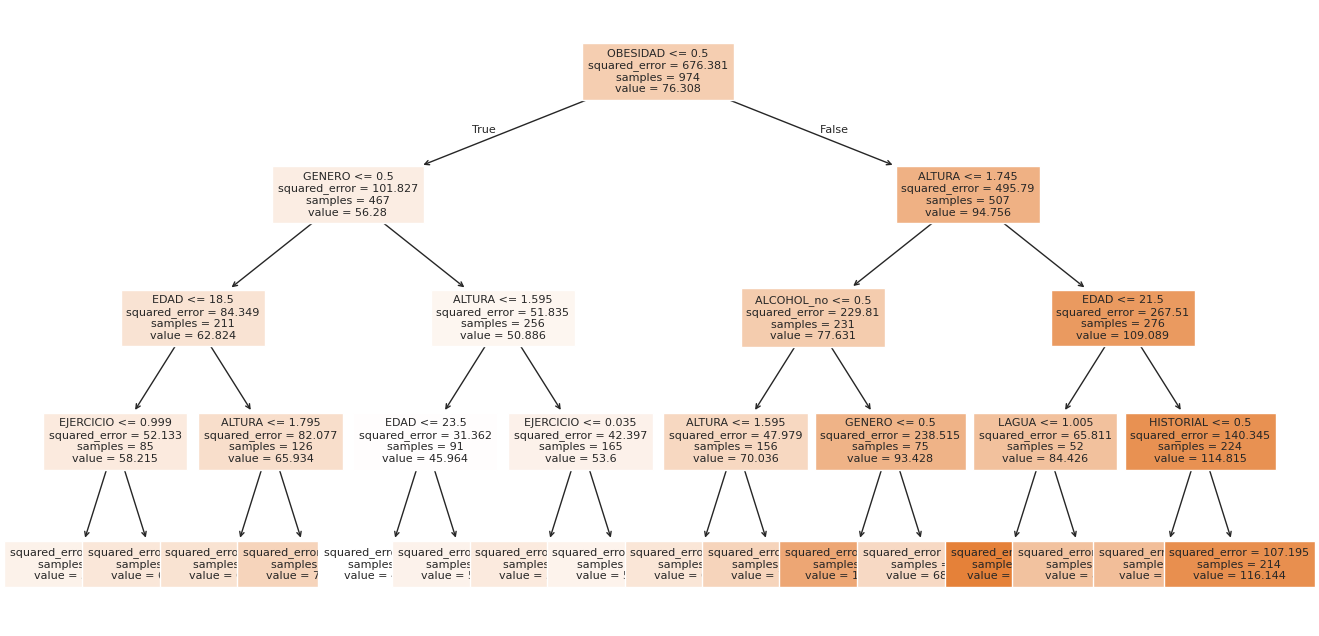

In [8]:
# Apartado 7
mejor_arbol = arbol if mae > mae_podado else arbol_podado
plt.figure(figsize=(16, 8))
plot_tree(mejor_arbol, feature_names=X.columns, filled=True, fontsize=8)
plt.show()

### Ejercicio 2

Utilizando el dataset OBESIDAD.csv, crea el random forest que consideres para realizar la clasificación de la columna OBESIDAD. Para ello, sigue los siguientes pasos:
   1. Carga el dataset y revisa los tipos de datos de los atributos para analizar si es necesario transformar alguno. En caso necesario realiza la transformación.
   2. Crea un hold-out (train-test) 80-20
   3. Crea un modelo random forest, estableciendo al menos 4 parámetros.
   4. Calcula al menos 4 métricas en el conjunto de test. Tras el cálculo de las métricas analiza los resultados.
   5. Realiza una búsqueda de los mejores parámetros.
   6. Compara los resultados del  ensamble random forest con los méjores parámetros en el conjunto de test y con los parámetros establecidos inicialmente. Analiza los resultados e indica cuáles son los principales cambios en los parámetros y el porqué mejora o empeora el resultado.
   7. En base a los resultados obtenidos en los apartados anteriores ¿El modelo de Random Forest sería un modelo, estable robusto y recomendable para la obesidad de los pacientes?

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [10]:
# Apartado 1
df = pd.read_csv('OBESIDAD.csv', sep=';')

print("Datos originales")
print(df.info())

# Transformar variables categóricas
ohe = OneHotEncoder(sparse_output=False, drop='first')
alcohol_encoded = ohe.fit_transform(df[['ALCOHOL']])
alcohol_cols = ohe.get_feature_names_out(['ALCOHOL'])
df_alcohol = pd.DataFrame(alcohol_encoded, columns=alcohol_cols, index=df.index)

# Concatenar y eliminar la columna original
df = pd.concat([df.drop('ALCOHOL', axis=1), df_alcohol], axis=1)

# Comprobamos la transformación
print("\nDatos transformados")
print(df.dtypes)

Datos originales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GENERO      1146 non-null   int64  
 1   EDAD        1146 non-null   int64  
 2   ALTURA      1146 non-null   float64
 3   PESO        1146 non-null   float64
 4   HISTORIAL   1146 non-null   int64  
 5   CBASURA     1146 non-null   int64  
 6   NVEGETALES  1146 non-null   float64
 7   NCOMIDAS    1146 non-null   float64
 8   FUMAS       1146 non-null   int64  
 9   LAGUA       1146 non-null   float64
 10  CCALORIAS   1146 non-null   float64
 11  EJERCICIO   1146 non-null   float64
 12  TECNOLOGIA  1146 non-null   float64
 13  ALCOHOL     1146 non-null   object 
 14  OBESIDAD    1146 non-null   int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 134.4+ KB
None

Datos transformados
GENERO                  int64
EDAD                    int64
ALTURA                float64

In [11]:
# Apartado 2
X = df.drop('OBESIDAD', axis=1)
y = df['OBESIDAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)

In [12]:
# Apartado 3
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=semilla
)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,4
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# Apartado 4
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Inicial:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Inicial:
Accuracy: 0.9391
Precision: 0.9358
Recall: 0.9358
F1 Score: 0.9358
Confusion Matrix:
[[114   7]
 [  7 102]]


In [14]:
# Apartado 5
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}
grid = GridSearchCV(RandomForestClassifier(random_state=semilla), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

,estimator,RandomForestC...dom_state=123)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [15]:
# Apartado 6
best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)
prec_best = precision_score(y_test, y_pred_best)
rec_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("\nRandom Forest optimizado:")
print("Mejores parámetros:", grid.best_params_)
print(f"Accuracy: {acc_best:.4f}")
print(f"Precisión: {prec_best:.4f}")
print(f"Recall: {rec_best:.4f}")
print(f"F1-score: {f1_best:.4f}")
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_best))


Random Forest optimizado:
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9348
Precisión: 0.9434
Recall: 0.9174
F1-score: 0.9302
Matriz de confusión:
 [[115   6]
 [  9 100]]


In [16]:
# Apartado 7
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_best))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       121
           1       0.94      0.92      0.93       109

    accuracy                           0.93       230
   macro avg       0.94      0.93      0.93       230
weighted avg       0.93      0.93      0.93       230

